# -----------------------------------

### October 2025. The Great Pumpkin King is about to take over the world. 

<img src= "pumpkinking.png" width=100 height=100 /> 

# The only one that can stop him is the Octoknight. The Great Pumpkin King though, made sure to lock the Octoknight up. 

<img src="octoknight_lockedup.png" width=100 height=100 /> 


## Your mission, if you chose to accept it, is to help the Octoknight escape. To do this, you will need to bring together all your Python skill and things you have learned so far, as well as some Astronomy knowledge, to solve a few puzzles. In the process, you will retrieve the code that will free the Octoknight.

### Good luck!

### -----------------------------------

## 1. The start is half everything! ( $-$ Plato )

### a. Start by doing all necessary imports. Come back here to add imports as needed throughout the notebook. (4.5 points). 
Note that any imports left throughout the code will cost you 1 point per import!



In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import re
from scipy.stats import norm
import pickle
import os
from astropy.io import fits
from astropy.stats import sigma_clip
from astropy.stats import sigma_clipped_stats
from photutils.centroids import centroid_2dg,centroid_com
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from scipy.ndimage import median_filter
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

import matplotlib.patches as pat
from astropy import modeling
import gaussian as g
import radprof as R
import disk as d

### b. Start an empty list named *key* that will contain the key to release the Octoknight (.5 point)

In [24]:
key=[]

### c. Don't forget to commit your project to GitHub often. If your laptop crashes close to the deadline there will be no chance of you saving the day (and getting a good grade in the process) if you haven't committed your progress in the meantime!

In [79]:
#committed to github throughout and after completion

### 2. Look at all these errors! (30 points)

### You turn around the corner. On the opposite wall there are weird shapes. You approach and you notice a keypad. Next to it there  two spheres that look like they orbit each other. You keep on looking around and notice the following curved at the bottom of one of the spheres:
$$\frac{V_1}{V_2} = 125.0 \pm ?? $$

#### *find the answer and press the right number for this door to open*. 

### You take a closer look and you notice on the spheres these numbers written: $40.0\pm0.3$, $8\pm0.2$. 

- Do the error propagation. What is the ??. Take into account the number of significant figures correctly and pay attention to the puzzle! (9 points).

In [26]:
# Assuming that the numbers carved on spheres were radii
R1 , dR1 = 40.0,0.3            
R2 , dR2 = 8.0,0.2

f = (R1**3 / R2**3) 
pR1 = 3 * R1**2 / R2**3
pR2 = -3 * R1**3 / R2**4
df = np.sqrt((pR1 * dR1)**2 + (pR2 * dR2)**2)
print(f"The ratio V1/V2 = {f} +- {df:.1f} ")

The ratio V1/V2 = 125.0 +- 9.8 


### The correct answer for ?? is 9 8 ###

### Did you solve the first puzzle? Type the code *puzzle1_\<youranswer>* to see if puzzle1.pdf opens!


### A door opens to a small room with an old-school desktop computer in the middle. You walk towards it to find more equations waiting there for you. 

### For the following, do the error propagation (**20 points**) and store the first decimal digit of the error (e.g., for $1.23\pm0.56$ you will keep the 5; don't do any rounding!) in a separate key (e.g., *key2*). Use this key to open file *puzzle2.pdf*. 
### *puzzle2.pdf* contains the first digit of your *key*. Append it to your *key* (1 point).

1. $ (2.42 \pm 0.12) \times (1.23 \pm 0.28) = $ ______ $\pm$ ______
2. $ (3.1 \pm 0.2) + (1.2 \pm 0.8) = $ ______ $\pm$ ______
3. $ \frac{2.4 \pm 0.4}{1.2 \pm 0.3} = $ ______ $\pm$ ______
4. $ (8.1 \pm 0.5) \times (3.23 \pm 0.64) = $ ______ $\pm$ ______
5. $ (3.1 \pm 0.3) + (1.2 \pm 0.1)^2 = $ ______ $\pm$ ______
6. $ \frac{1.43 \pm 0.21}{(7.32 \pm 0.83)^3} = $ ______ $\pm$ ______

In [27]:
# Solving for all the above equations one by one and appending it in key2[]

In [28]:
key2 = []    # a new key for pdf2

In [29]:
x1,dx1,x2,dx2= 2.42,0.12,1.23,0.28
f = x1*x2
df1 = x2
df2 = x1
df = np.sqrt((df1 * dx1)**2 + (df2 * dx2)**2)
print(f"The answer for 1. is  = {f:.2f} +- {df:.2f} ")
shifted = abs(df) * 10
key2.append(int(shifted) % 10)
key2

The answer for 1. is  = 2.98 +- 0.69 


[6]

In [30]:
x1,dx1,x2,dx2= 3.1,0.2,1.2,0.8
f = x1+x2
df1 = 1
df2 = 1
df = np.sqrt((df1 * dx1)**2 + (df2 * dx2)**2)
print(f"The answer for 2. is  = {f:.1f} +- {df:.1f} ")
shifted = abs(df) * 10
key2.append(int(shifted) % 10)
key2

The answer for 2. is  = 4.3 +- 0.8 


[6, 8]

In [31]:
x1,dx1,x2,dx2= 2.4,0.4,1.2,0.3
f = x1/x2
df1 = 1/x2
df2 = -x1/x2**2
df = np.sqrt((df1 * dx1)**2 + (df2 * dx2)**2)
print(f"The answer for 3. is  = {f:.1f} +- {df:.1f} ")
shifted = abs(df) * 10
key2.append(int(shifted) % 10)
key2

The answer for 3. is  = 2.0 +- 0.6 


[6, 8, 6]

In [32]:
x1,dx1,x2,dx2= 8.10,0.50,3.23,0.64
f = x1*x2
df1 = x2
df2 = x1
df = np.sqrt((df1 * dx1)**2 + (df2 * dx2)**2)
print(f"The answer for 4. is  = {f:.2f} +- {df:.2f} ")
shifted = abs(df) * 10
key2.append(int(shifted) % 10)
key2

The answer for 4. is  = 26.16 +- 5.43 


[6, 8, 6, 4]

In [33]:
x1,dx1,x2,dx2= 3.1,0.3,1.2,0.1
f = x1+x2**2
df1 = 1
df2 = 2*x2
df = np.sqrt((df1 * dx1)**2 + (df2 * dx2)**2)
print(f"The answer for 5. is  = {f:.2f} +- {df:.2f} ")
shifted = abs(df) * 10
key2.append(int(shifted) % 10)
key2

The answer for 5. is  = 4.54 +- 0.38 


[6, 8, 6, 4, 3]

In [34]:
x1,dx1,x2,dx2= 1.43,0.21,7.32,0.83
f = x1/x2**3
df1 = 1/x2**3
df2 = -3/x2**4
df = np.sqrt((df1 * dx1)**2 + (df2 * dx2)**2)
print(f"The answer for 6. is  = {f:.2f} +- {df:.2f} ")
shifted = abs(df) * 10
key2.append(int(shifted) % 10)

The answer for 6. is  = 0.00 +- 0.00 


In [35]:
key2      # For pdf_2

[6, 8, 6, 4, 3, 0]

In [36]:
key.append(7)     # PDF_2 contained the number 7  
key

[7]

### 3.  The signal to noise resolution (15 points)

### You are doing great so far! Let's look for the next clue. You look around and notice a piece of paper at the far corner of the room. You pick it up and read:

<img src="problem3_note.png" width=800 height=500 /> 


### All of this sounds familiar. You actually have a book that describes similar concepts. You can do this! 

#### Tip: read Howel 4.6 through 5 for a refresher of your memory 

In [37]:
rnoise = 3   # e-
flx = 900    # photons per second
pixel = 13

# 1. ten 5 second exposures
t = 5     #sec
nexp = 10 #no. of exposures
S = flx * t * nexp
N = np.sqrt(S + pixel * rnoise**2 * nexp )
SN1 = S/N 
print(f"1.ten 5 second exposures S/N is : {SN1:.1f}")

# 2. one 50 second exposure
t = 50    #sec
nexp = 1
S = flx * t * nexp
N = np.sqrt(S + (pixel * rnoise**2 * nexp) )
SN2 = S/N
print(f"2.one 50 second exposure S/N is : {SN2:.1f}")

1.ten 5 second exposures S/N is : 209.4
2.one 50 second exposure S/N is : 211.9


The better S/N is for 50 second integration

In [38]:
key.append(int(SN2)) # Appending the int part of the better SNR
key

[7, 211]

### 4. No pain no gain? (10 points)

### Happy that you found the answer, you turn the paper to leave it on a nearby desk and notice there is more text on the back: 

<img src=" problem4_note.png" width=800 height=500 />  

In [39]:
mADU = 32 # Mean ADU
std = 2   # STD Ddeviation
gain =  mADU / (std**2)  # gain = mean/variance
print(gain,'e- per ADU')

8.0 e- per ADU


In [40]:
key.append(int(gain))   # Appending the gain in key[]
key

[7, 211, 8]

### 5. The sample study (15 points)

### Walking around, you notice a spectrum plotted on a computer screen. The plot has a big arrow on top of an emission line.  Read the contents of file *emission_spec.dat* in a variable. The file contains all the photon measurements across this particular emission line. 

- How many numbers are there? (1 point)

- Use the appropriate Python function to plot a histogram of the data. Use 20 bins of width 5 each. (3 points) 

- What function do the data seem to follow? (3 points) This is a typical, simple model that you can use for fitting your emission or absorption lines with.

- Use the appropriate analytic function to overplot ('fit') this function with the same mean and standard deviation as your data have. (4 points)

- Based on the part of the spectrum that you saw the line you know that it starts at about 1.35$\mu$m with a total width of about 0.1$\mu$m. Assume that the center of each of your bins corresponds to a measured wavelength ($\lambda$). What is the spectral resolution ($\Delta\lambda$=$\lambda_i - \lambda_{i-1}$) of these data? 

- Which absorption line does this correspond to? Use the mean molecular weight of this species as the next part of your *key*. Do this in a single line using the appropriate Python commands. (1 point)

In [41]:
with open("emission_spec.dat", "r") as file:
    data = file.read()
    
# there are no ',' or delimiters in the file
numbers = re.findall(r"[-+]?\d*\.\d+e[+-]?\d+",data)  # Get all the numbers with scientific notation
em = np.array([float(num.replace("\\", "")) for num in numbers]) 
print('The total amount of numbers in this file are: ',len(em))

The total amount of numbers in this file are:  90000


Text(0, 0.5, 'Frequency')

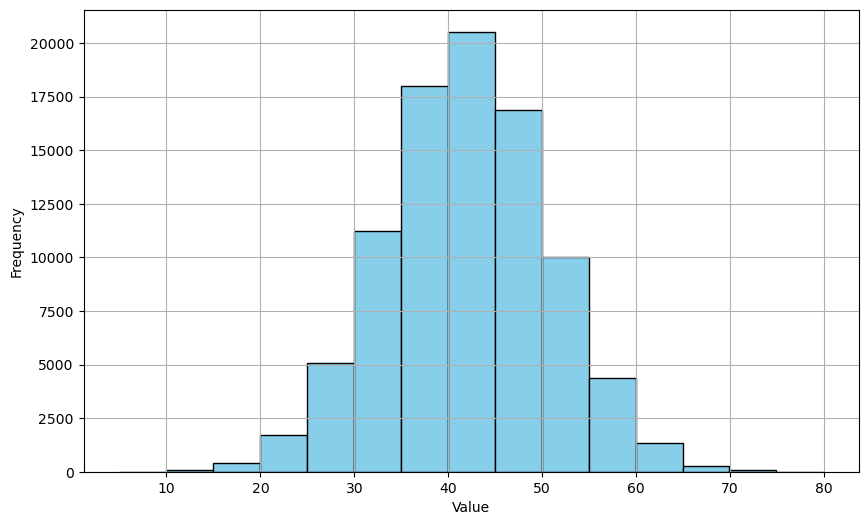

In [42]:
bins = np.arange(np.min(em), np.max(em) + 5 , 5)
plt.figure(figsize=(10,6))
plt.hist(em, bins= bins, color='skyblue', edgecolor='black', label = 'Data Histogram')
plt.grid()
plt.xlabel("Value")
plt.ylabel("Frequency")

### The data seem to follow a Gaussian spectrum

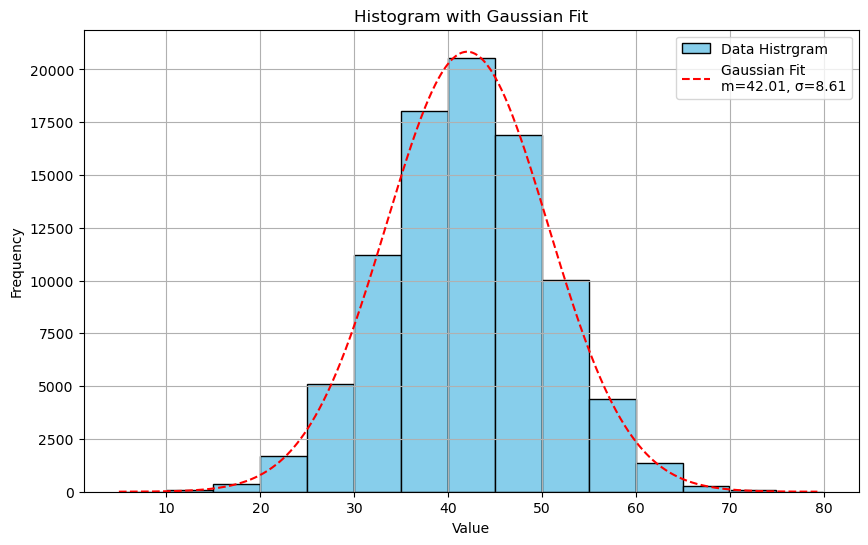

In [78]:
# Plot Gaussian to overlap the data and get best fit
mean = np.mean(em)
std = np.std(em)
x = np.linspace(min(em),max(em),1000)
gaus = norm.pdf(x,mean,std)*len(em)*(bins[1]-bins[0])
plt.figure(figsize=(10,6))
plt.hist(em, bins = bins, color='skyblue', edgecolor='black',label='Data Histrgram')
plt.plot(x, gaus,'r--',label=f'Gaussian Fit\nm={mean:.2f}, σ={std:.2f}')
plt.title("Histogram with Gaussian Fit")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

In [44]:
# Calculate spectral resolution
start_lambda = 1.35  # micrometers
total_width = 0.1    # micrometers
num_bins = len(em)
delta_lambda = total_width/num_bins
print(f"Spectral resolution (Δλ): {delta_lambda:.6f} μm")

mean_index = int(mean/max(em)*num_bins)
mean_lambda = start_lambda+mean_index*delta_lambda
print(f"Closest absorption line: {mean_lambda:.2f}μm compared to 1.42μm for Water Vapor (H₂O)")
print(f"Mean molecular weight:    18.015g/mol")
mol_weight_H2O = 18

Spectral resolution (Δλ): 0.000001 μm
Closest absorption line: 1.40μm compared to 1.42μm for Water Vapor (H₂O)
Mean molecular weight:    18.015g/mol


In [45]:
key.append(mol_weight_H2O)

In [46]:
key

[7, 211, 8, 18]

### 6. Counting photons (25 points)

###  You arrive at the top of the castle. There is a telescope there pointed at some weird object in the distance. You use it to take an image so that you can see what it points to. Unfortunately, the object is far away and you are not sure you have a good image, so you make multiple shots hoping for the best. Let's check your images out!

- Read-in the 80 images you took and stored in file *puzzle6images.pickle*. (3 points)
- Plot images 0, 3, 11, 45 and 75 in separate plots. How do your data look like? What do you think your SNR is? (4 points)
- Descrive what would you do to improve the situation. (7 points)
- Use your astronomical data analysis skills to get a good image out of your images. (8 points)
- What do you see in the final image? The answer is the next digit for your key (3 points)
- Append it to the key.

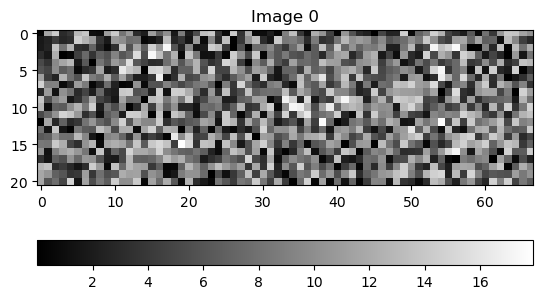

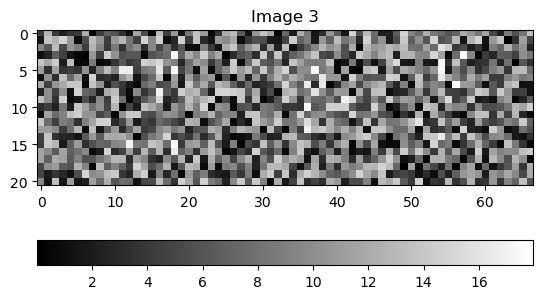

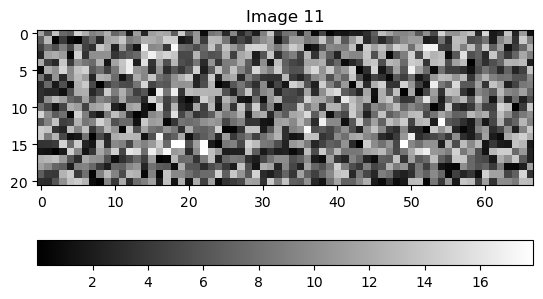

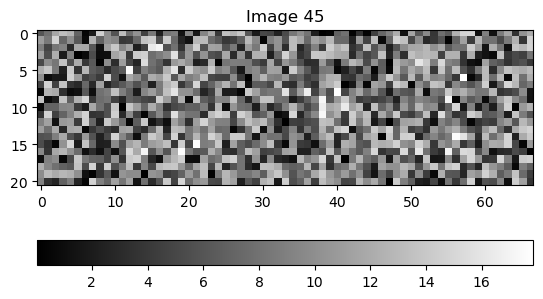

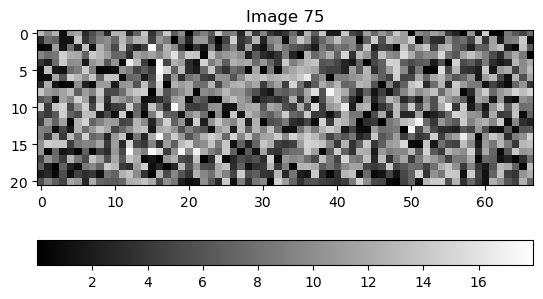

In [47]:
with open('puzzle6images.pkl','rb') as f:
    images = pickle.load(f)
for i in (0,3,11,45,75):
    plt.imshow(images[i], cmap = 'gray')
    plt.title(f"Image {i}")
    plt.colorbar(orientation = 'horizontal')
    plt.show()

### The data is noisy and SNR is low ###

In [48]:
signal = np.mean(images, axis = 0)
noise = np.std(images, axis = 0)
noise[noise==0]=10**-10       #remove any zero values
SNR = signal/noise
average_SNR = np.mean(SNR)
print(f"Average SNR of the stack is : {average_SNR:.2f}")

Average SNR of the stack is : 1.83


### We can average the image stack to reduce random noise and enhance the features ###

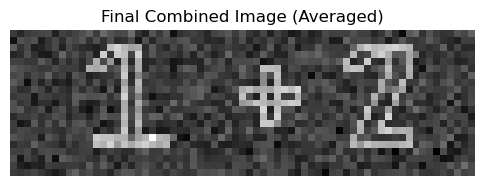

In [49]:
# Average the images to improve SNR
final_image = np.mean(images, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(final_image, cmap='gray')
plt.title('Final Combined Image (Averaged)')
plt.axis('off')
plt.show()


In [50]:
key.append(3)

In [51]:
key

[7, 211, 8, 18, 3]

## 7. The image analysis (35 points)

### Things seem to be going smooth so far! You keep on looking for clues. Nearby, you notice a computer with a few observations plotted on the screen. 

- Read all observations in folder problem7_obs into one datacube (5 points) 
- Plot them (5 points) 
- Describe all the things you see in the images (2 points) 
- Proceed to work on the observations so that you clean up any artifacts. Use appropriate methods to find the center of the stars and do PSF fitting! (10 points)

- What are the center locations of the stars? (3 points)
- Plot the radial profiles for the 2 stars (6 points) 
- What are the heights of your PSFs? Subtract them from one another and add the int part to your key (4 points)

- Append it to your *key*. 

In [52]:
# Initialize data cube                                                             # 5 points
fits_images = []      
folder = 'problem7_obs'
for filename in os.listdir(folder):
    if filename.lower().endswith('.fits'):
        file_path = os.path.join(folder,filename)
        with fits.open(file_path) as hdul:
            fits_data = hdul[0].data
            fits_images.append(fits_data)    # Append each frame in the data cube



Data Cube shape is : ( 40 2048 2048 )


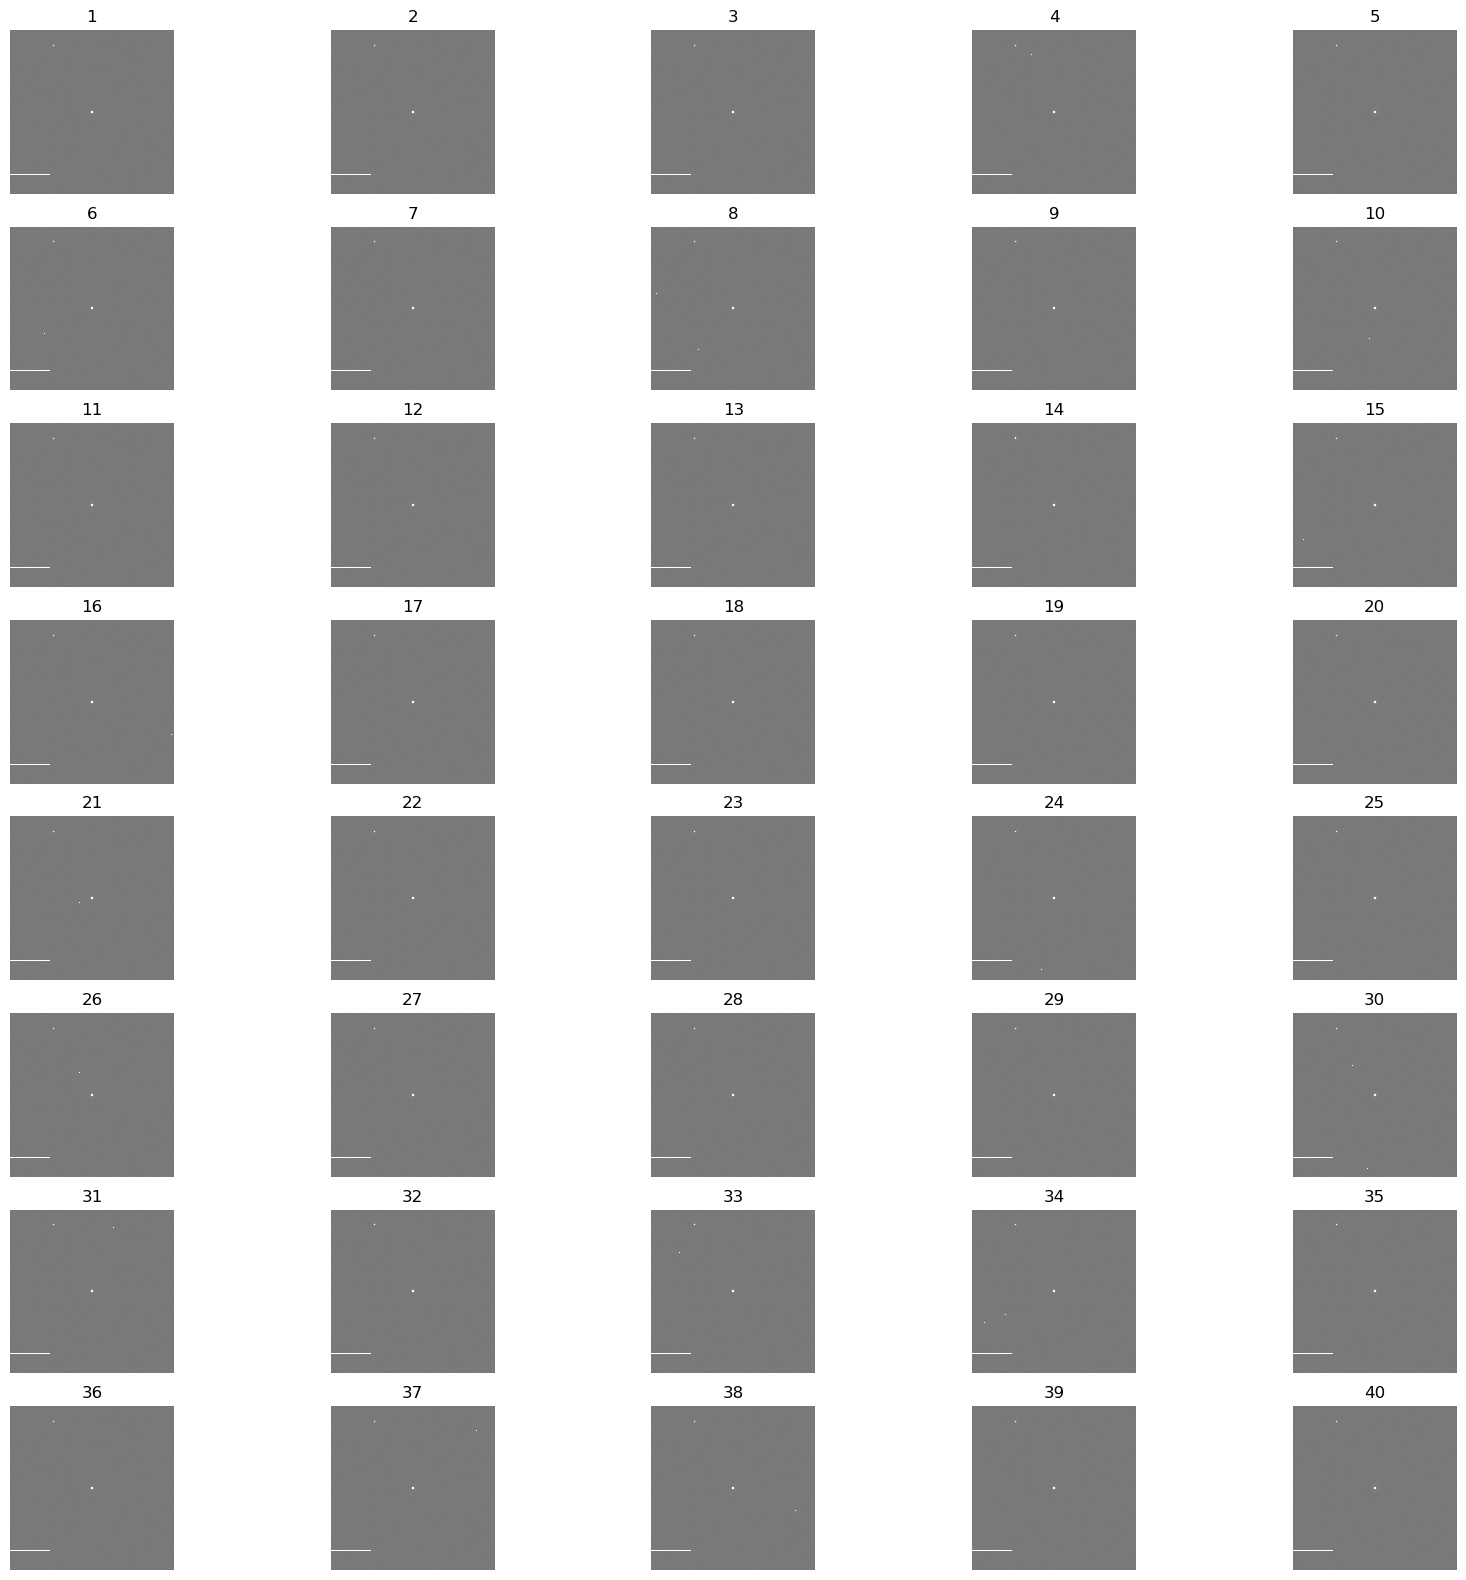

In [53]:
# Convert the data cube to an array                                             # 5 points
image_array = np.array(fits_images)    
N,X,Y = image_array.shape
print(f"Data Cube shape is : (",N,X,Y,")")

# Define plotting parameters
cols = 5
rows = int(len(image_array)/ cols)
quickmn = np.mean(image_array)
quicksg = np.std(image_array)
nsl = -0.2
nsu = 0.2
fig, axes = plt.subplots(rows,cols, figsize=(20,20))    
axes = axes.flatten()

for i in range (len(image_array)):
    axes[i].axis('off')
    if i < len(image_array):             # Stretch the images to see the stars
        axes[i].imshow(image_array[i],interpolation='none',origin='lower', 
           vmin=quickmn+nsl*quicksg, vmax=quickmn+nsu*quicksg, 
           cmap='gray'   ) 
        axes[i].axis('off')
        axes[i].set_title(f'{i+1}')
plt.show()

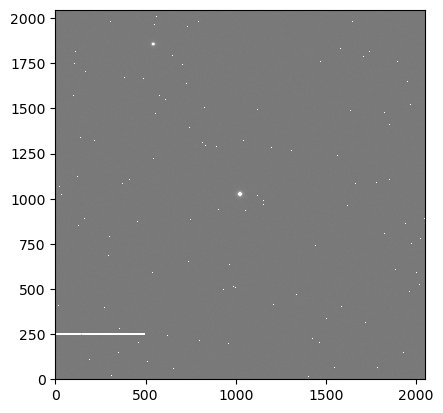

In [54]:
# Plot Image array                                                                   # 2 points
plt.imshow(np.mean(image_array,axis=0),interpolation='none',origin='lower', 
           vmin=quickmn+nsl*quicksg, vmax=quickmn+nsu*quicksg, 
           cmap='gray'   ) 

### The combined image of the fits files in folder problem7_obs is as shown above. All the files contain a star at the center and another comparable star in the upper left quadrant. There are many fainter stars in the background. The image also contains a pixel erro in the lower left quadrant. ###

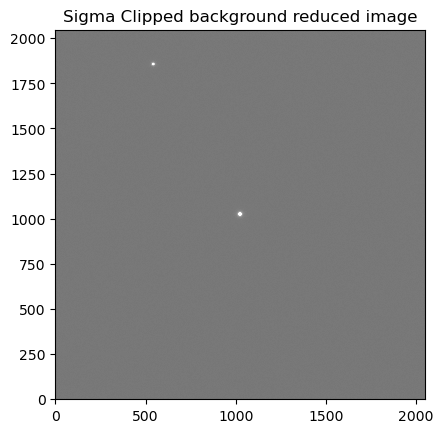

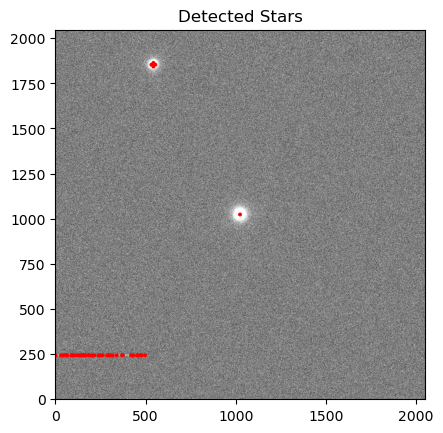

In [55]:
# 1 Clean up artifacts                                                             

# Sigma Clip the cube to get the background                                       
bckgrd_subtracted = []
for frame in fits_images:
    clipped = sigma_clip(frame, sigma=3)
    bkg = np.nanmedian(clipped.data[~clipped.mask])   
    bckgrd_subtracted.append(frame - bkg)             # Subtract Background from the main frame

# Convert the cube to array
bckgrd_subtracted = np.array(bckgrd_subtracted)

# Median combine to get Cleaned image
cleaned_image = np.median(bckgrd_subtracted, axis=0)
cleaned_image[245:255,:500] = np.median(cleaned_image)  # Manually remove the pixel defect

# Get Sigma Stats                                                               
mean, median, std = sigma_clipped_stats(cleaned_image, sigma=3.0)
vmin, vmax = np.percentile(cleaned_image, [0.5, 99.5])

# Plot cleaned image
plt.imshow(cleaned_image,interpolation='none',origin='lower', 
           vmin=quickmn+nsl*quicksg, vmax=quickmn+nsu*quicksg, 
           cmap='gray'   ) 
plt.title("Sigma Clipped background reduced image")
plt.show()



# 2 Find the Centers of stars

# Detect stars using DAOStarFinder function
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
sources = daofind(cleaned_image - median)

# Plot detections
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=5.)
plt.imshow(cleaned_image, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
apertures.plot(color='red', lw=1.5)
plt.title("Detected Stars")
plt.show()

# DAOStarfinder is detecting the pixel error as stars

###  DAOStarfinder is detenting the pixel error as stars.

In [56]:
# Use original frames to get accurate PSF determination
raw_data = np.median(image_array, axis=0) 

tmp = raw_data.copy()
centers = []

for i in range(2):
    iy, ix = np.unravel_index(np.argmax(tmp), tmp.shape)  # Co-ordinates of brightest star
    centers.append((ix, iy))
    print(f"The center of star {i} is :  ({ix},{iy})")
    
    # Remove the brightest star from temp for next iteration
    y1,y2 = max(0,iy-10), min(tmp.shape[0],iy+11)
    x1,x2 = max(0,ix-10), min(tmp.shape[1],ix+11)
    tmp[y1:y2, x1:x2] = np.median(tmp)                    
    

def fit_star(im, x0, y0, box=12):
    x0i,y0i = int(round(x0)), int(round(y0))
    x1,x2 = max(0,x0i-box), min(im.shape[1], x0i+box+1)
    y1,y2 = max(0,y0i-box), min(im.shape[0], y0i+box+1)
    cut = im[y1:y2, x1:x2]
    coords = np.indices(cut.shape)
    fw, fc, fh, err = g.fitgaussian(cut, coords)
    y_fit, x_fit = fc
    return {"x": x1 + float(x_fit), "y": y1 + float(y_fit), "height": float(fh)}

fits_nb = [fit_star(raw_data, x, y) for (x, y) in centers]
h1, h2 = fits_nb[0]["height"], fits_nb[1]["height"]
print(f"[MASTER no-blur] H1={h1:.3f}  H2={h2:.3f}  Δ={h1-h2:.3f}")

The center of star 0 is :  (543,1854)
The center of star 1 is :  (1024,1024)
[MASTER no-blur] H1=39.794  H2=9.387  Δ=30.407


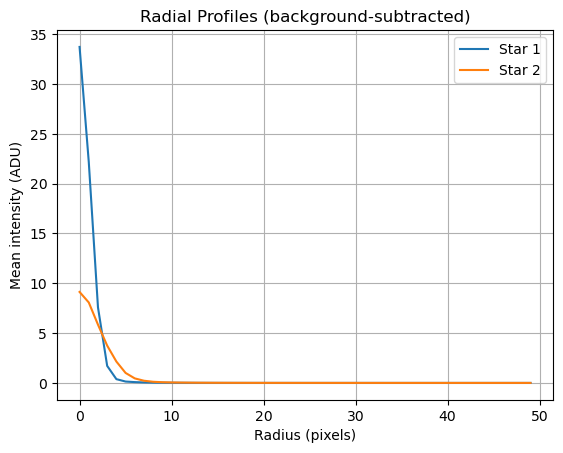

In [57]:
def radial_profile(image, center, rmax=1000):                                       # 6 points
    x0, y0 = center
    yy, xx = np.indices(image.shape)
    r = np.hypot(xx - x0, yy - y0)
    r_int = r.astype(int)
    tbin = np.bincount(r_int.ravel(), image.ravel())
    n_pixels = np.bincount(r_int.ravel())
    prof = tbin[:rmax] / np.maximum(n_pixels[:rmax], 1)
    return np.arange(rmax), prof

r1, p1 = radial_profile(cleaned_image, centers[0], rmax=50)
r2, p2 = radial_profile(cleaned_image, centers[1], rmax=50)

plt.figure()
plt.plot(r1, p1, label='Star 1')
plt.plot(r2, p2, label='Star 2')
plt.xlabel('Radius (pixels)'); plt.ylabel('Mean intensity (ADU)')
plt.title('Radial Profiles (background-subtracted)')
plt.legend(); plt.grid(True); plt.show()


In [58]:
key.append(int(h1-h2))
key

[7, 211, 8, 18, 3, 30]

### 8. All galaxies far far away (30 points)

### You have a few digits of your key already. Hopefully, they are all correct so far. Only time will tell....Where can the next clue be? There seems to be a weird astronomy theme to all clues so far!

### You see an image of Hubble Space Telescope's deep field and a floppy disk(!) with the note "$H_0$???". Read the data from file the_expansion.dat in an appropriately named variable (2 points). 

### The data appear to correspond to distances of some galaxies and their speeds. Plot the data in a publication-ready plot, assuming an error in the distance of 0.02Mpc and in the speed of 10 km/sec (8 points)

### Use these data to find Hubble's constant $H_0$ (15 points).  What is the value you find (5 points)? How does it compare to the modern value of  $H_0$ (3 points)?

### Append the first digit of the $H_0$  you found to your key.

In [60]:
hubble_data = np.loadtxt('the_expansion.dat', skiprows=2)
print(hubble_data)

[[ 3.20e-02  1.70e+02]
 [ 3.40e-02  2.90e+02]
 [ 2.14e-01 -1.30e+02]
 [ 2.63e-01 -7.00e+01]
 [ 2.75e-01 -1.85e+02]
 [ 2.75e-01 -2.20e+02]
 [ 4.50e-01  2.00e+02]
 [ 5.00e-01  2.90e+02]
 [ 5.00e-01  2.70e+02]
 [ 6.30e-01  2.00e+02]
 [ 8.00e-01  3.00e+02]
 [ 9.00e-01 -3.00e+01]
 [ 9.00e-01  6.50e+02]
 [ 9.00e-01  1.50e+02]
 [ 9.00e-01  5.00e+02]
 [ 1.00e+00  9.20e+02]
 [ 1.10e+00  4.50e+02]
 [ 1.10e+00  5.00e+02]
 [ 1.40e+00  5.00e+02]
 [ 1.70e+00  9.60e+02]
 [ 2.00e+00  5.00e+02]
 [ 2.00e+00  8.50e+02]
 [ 2.00e+00  8.00e+02]
 [ 2.00e+00  1.09e+03]]


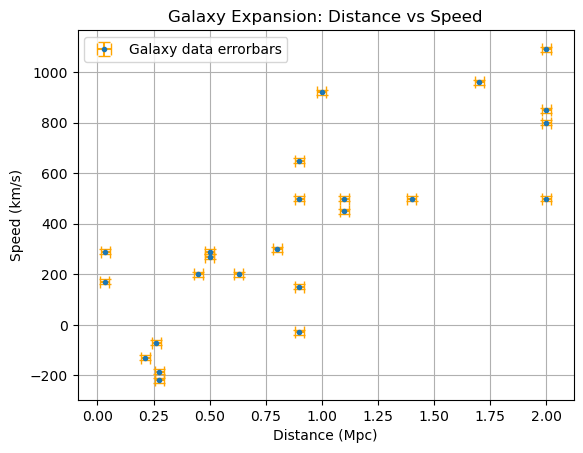

In [61]:
x = hubble_data[:,0]
y = hubble_data[:,1]
distance_error = 0.02  # Mpc
speed_error = 10       # km/s

# Create the plot
plt.errorbar(x,y, xerr=distance_error, yerr=speed_error, 
             fmt='.', ecolor='orange',capsize=4,label='Galaxy data errorbars')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Speed (km/s)')
plt.title('Galaxy Expansion: Distance vs Speed')
plt.legend()
plt.grid()

### This is known as a Hubble diagram. The slope of the best-fit line on the data points represents the value of \(Ho\). 

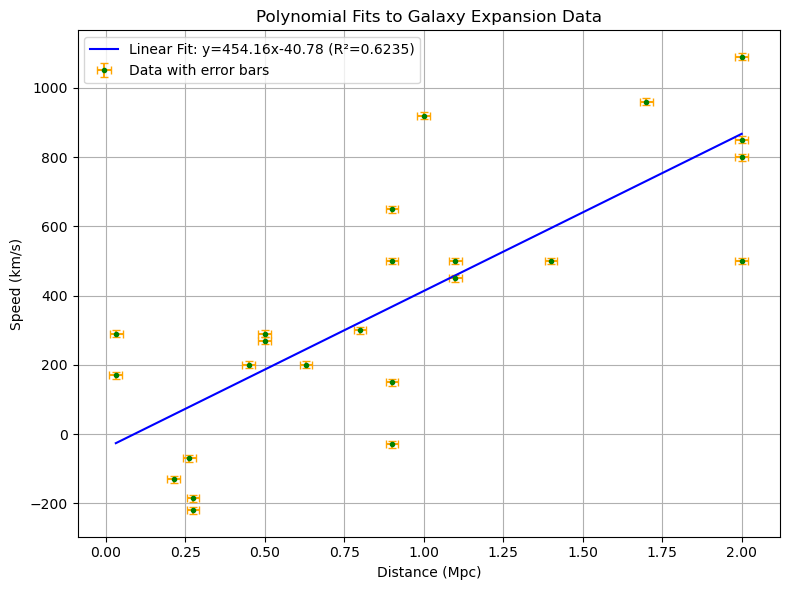

In [62]:
#Fit polynomials of degree 1
coeffs_linear = np.polyfit(x, y, 1)

#Generate fitted y-values
x_fit = np.linspace(min(x), max(x), 500)
y_fit_linear = np.polyval(coeffs_linear, x_fit)
r2_linear = r2_score(y, np.polyval(coeffs_linear, x))
# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(x, y, xerr=distance_error, yerr=speed_error, fmt='.', label='Data with error bars', capsize=3, color='green', ecolor='orange')
plt.plot(x_fit, y_fit_linear, label=f'Linear Fit: y={coeffs_linear[0]:.2f}x{coeffs_linear[1]:.2f} (R²={r2_linear:.4f})', color='blue')

plt.xlabel('Distance (Mpc)')
plt.ylabel('Speed (km/s)')
plt.title('Polynomial Fits to Galaxy Expansion Data')
plt.legend()
plt.grid()
plt.tight_layout()

### The slope of the line fit is 454.16

### The modern value of hubble constant Ho is 70 km/s/Mpc

In [63]:
key.append(4)

In [64]:
key

[7, 211, 8, 18, 3, 30, 4]

### 9. The RV connection (15 points)

### A few more digits to go and you have the whole key. Continuing the fitting trend you see another floppy disk with a note on it 'Which planet are these RV measurements of?' 

- If you want to refresh your memory about what an RV measurement is, check these out:
    - https://www.eso.org/public/videos/eso1035g/ 
    - https://www.planetary.org/articles/color-shifting-stars-the-radial-velocity-method 
    

- Youn insert the disk and read the data from file 'problem9_rv.csv' (2 points)
- Explore the data. Plot the data in a publication ready-plot (5 points)
- Fit the data with an appropriate model. (10 points)
- What is the amplitude and period of the data? (8 points)
- Based on your fit what is the distance of the planet to its parent star, if you assume the star has a 1.1$M_\odot$? [Tip: remember Kepler's laws] (8 points)
- Based on your fit what is the mass of the planet in Jupiter masses (use equation $M_\mathrm{pl} = M_\mathrm{star} \frac{K_\mathrm{star}}{\sqrt{GM_\mathrm{star}/r_\mathrm{AU}}}$) ? (8 points) 
- Using this table, which exoplanet do you think the data are off (1 point)? Use the mass of the planet as shown in the table (w/o the period) as the next part of the key. 


| Name of planet| Mass ($M_J$) | Period (days) |
|---|---|---|
Gliese 876 d|	0.021	| 1.938
Tau Boötis b|	8.389	| 3.312
HD 38529 b	 |   0.782	| 14.310
51 Pegasi b |	0.472 |	4.231
Gliese 876 e|	0.046 |	124.262


In [65]:
#read csv file
filename = 'problem9_rv.csv'
df = pd.read_csv(filename)

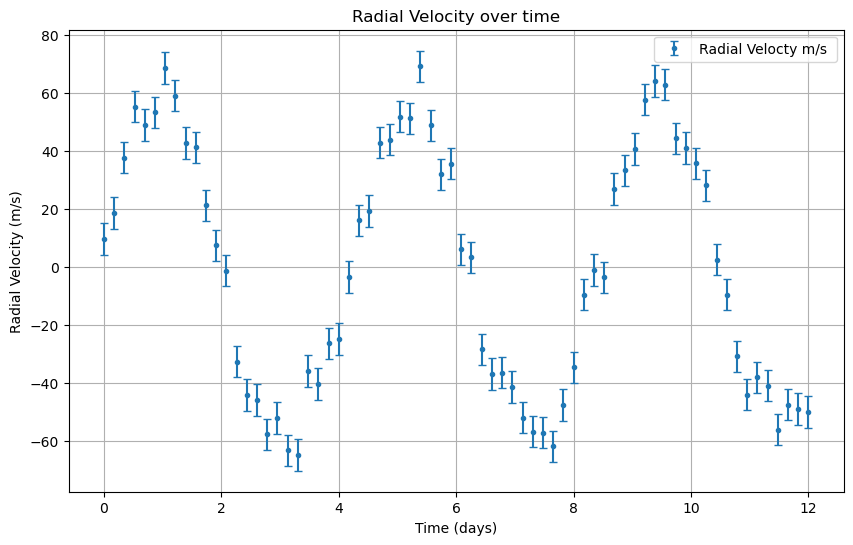

In [66]:
time = df['Time [days]']
r_v = df['Radial Velocity [m/s]']
r_v_error = df['RV error [m/s]']
plt.figure(figsize=(10,6))
plt.errorbar(time, r_v , yerr = r_v_error , fmt = '.', capsize = 3 , label = 'Radial Velocty m/s ')
plt.title('Radial Velocity over time')
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (m/s)')
plt.grid()
plt.legend()

Fitted parameters: 
Amplitude=57.872(m/s), omega=0.235/day, phi=0.157, C=-1.179
The period of the function is = T = 4.251 days


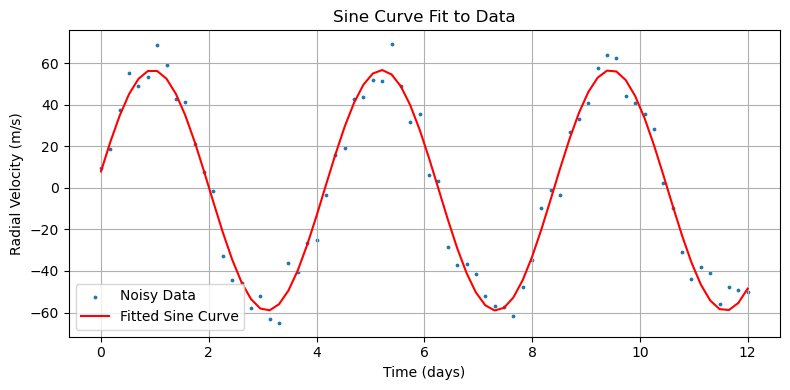

In [67]:
# Data appears sinusoidal, define a sine function
def sine_function(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi) + C

#Use curve_fit
initial_guess = [3, 1.5, 1.0, 2.0]
popt, pcov = curve_fit(sine_function, time , r_v, p0=initial_guess)

A_fit, omega_fit, phi_fit, C_fit = popt
print(f"Fitted parameters: ")
print(f"Amplitude={A_fit:.3f}(m/s), omega={(omega_fit)/2/np.pi:.3f}/day, phi={phi_fit:.3f}, C={C_fit:.3f}")
print(f"The period of the function is = T = {(omega_fit**-1)*2*np.pi:.3f} days")
#Plot fitted radial velocity data
plt.figure(figsize=(8, 4))
plt.scatter(time, r_v , label='Noisy Data', s=3)
plt.plot(time, sine_function(time, *popt), color='red', label='Fitted Sine Curve')
plt.title('Sine Curve Fit to Data')
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (m/s)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [69]:
# From keplers laws we know that 𝑇2 ≈ 4𝜋2*𝑎3 / GM(star)  where a is the distance between the planet and the star
G = 6.67*10**(-11)
m_sun = 1.989*10**30    #kg
M_star = 1.1 * m_sun
T_orbit = 4.251 * 24 * 60 * 60  #sec

d_p_s3  =  ((T_orbit**2) * G * M_star / (4*np.pi**2 ) )   #a3
r_au = d_p_s3**(1/3) /(1.496*10**11 )                      # a in AU
print(f'The distance of planet from its parent star : {(r_au):.3e} AU')

# Calculate mass of the planet in kg
# mp sin i =  K (TMstar**2 / 2𝜋G )**1/3  

M_jup = 1.898*10**27  #kg
K_star = A_fit
M_pl = A_fit * (( T_orbit * M_star**2 )/ (2*np.pi*G ))**(1/3)

print(f"Mass of the planet : {M_pl:.3e}kg or {M_pl/M_jup :.3f} times the mass of jupiter")

The distance of planet from its parent star : 5.301e-02 AU
Mass of the planet : 9.334e+26kg or 0.492 times the mass of jupiter


## mass_ratio = 0.472 is closest to my calculated value

In [71]:
key.append(0)
key.append(472)
key

[7, 211, 8, 18, 3, 30, 4, 0, 472]

### 10. A sky full of stars (20 points)

### The end is in sight!  You walk in another room and you see the following written on a piece of paper 

<div class="alert alert-block alert-warning">
The stars are shifting, and time is running out. Hidden among the star cluster —an ancient gathering bound by motion and memory— masked by the chaos of the galaxy’s drift, are some interloppers. You’ve been given their  traces, a whisper of their journey across the sky. Study the patterns before they fade, and uncover the truth before the trail disappears into the void.  
</div>

### What does this all mean? You look around and see an image of the Pleiades on the wall. You approach and look carefully around. Behind the frame there is a usb stick. You plug it into your computer and find the file *star_motions.dat*. 

### These are data with the RA, Dec, and proper motion RA and Dec (pmRA and pmDec) of a number of stars. Most of these stars belong to the same cluster, while some are field stars that are projected in the same Field-Of-View (FOV) as the cluster. 

- Make a side-by-side plot of the (RA, Dec) and (pmRA, pmDec) of the stars (10 points)
- Knowing that stars that belong in the same group (cluster) have similar kinematics (their pmRA, pmDec is from the same parent distribution), find which stars are interlopers and which belong in the same distribution.

    - Use the sigma rejection (use a $2\sigma$ threshold) on the proper motion of the stars. How many interlopers are there in the FOV? (10 points). 
    - Append this number to your key.

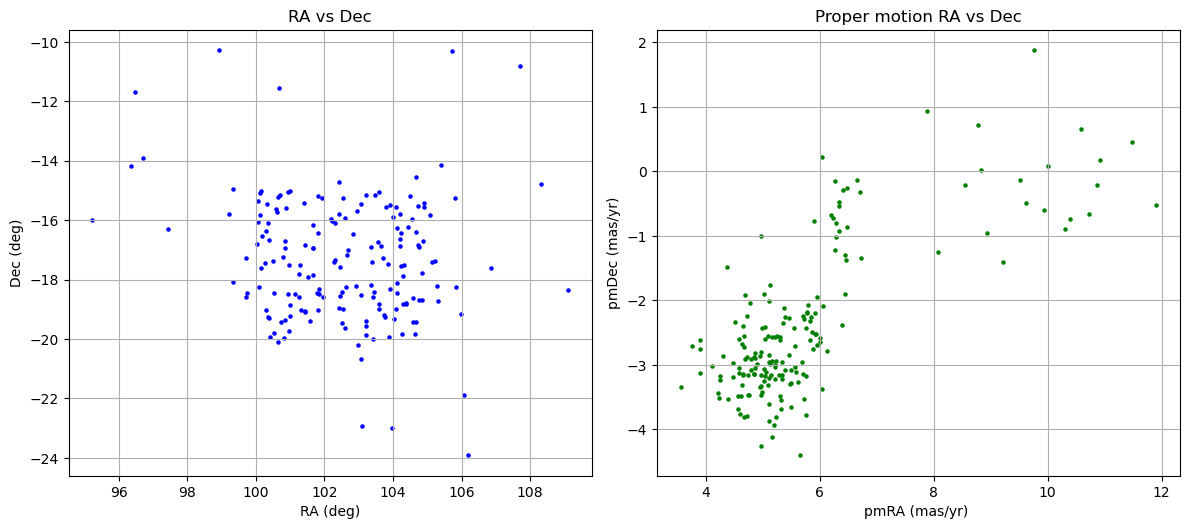

In [72]:
# Load the file and get all columns to plot

star_motion = np.loadtxt('star_motions.dat',skiprows=1)
RA,Dec,pmRA,pmDec = star_motion[:,0],star_motion[:,1],star_motion[:,2],star_motion[:,3]

#plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(RA , Dec, s=5 ,  c='blue')
plt.title('RA vs Dec')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.grid()
plt.subplot(2,2,2)
plt.scatter(pmRA , pmDec, s=5 , c='green')
plt.title('Proper motion RA vs Dec')
plt.xlabel('pmRA (mas/yr) ')
plt.ylabel('pmDec (mas/yr)')
plt.grid()
plt.tight_layout()
plt.show()

In [73]:
# Sigma rejection to find interlopers
mean_pmRA = np.mean(pmRA)
std_pmRA = np.std(pmRA)
mean_pmDec = np.mean(pmDec)
std_pmDec = np.std(pmDec)

# Threshold of 2-sigma
threshold = 2

# Identify interlopers
interlopers = ((np.abs(pmRA - mean_pmRA) > threshold * std_pmRA)|
               (np.abs(pmDec - mean_pmDec) > threshold * std_pmDec))
num_interlopers = np.sum(interlopers)
print(f"Number of interlopers in the FOV: {num_interlopers}")

Number of interlopers in the FOV: 18


In [74]:
key.append(18)

In [75]:
key

[7, 211, 8, 18, 3, 30, 4, 0, 472, 18]

### 11. You got the key! Will it work? Try to open file *octoknight_freed.pdf* . You did it! Octoknight will now banish the Great Pumkin king to another Universe. You saved the world! 

### Don't forget to tar.gz your file, update your log, commit one last time to GitHub and submit your Midterm! (5 points)

## Great job!

In [77]:
# 72118183304047218